In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# for reproducability
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)


def read_array(fname):
    '''read an array from txt file'''
    with open(fname) as f:
        for line in f:
            pairs = line.split(',')
            #print(pairs)
    return [float(item) for item in pairs]

/home/stone/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load training data

In [2]:
# define paths of the Aesthetic Features
path_AF_Mean = '/media/stone/Data/DataSet_me18me/me18me-devset/dev-set/features/aesthetic_visual_features/aesthetic_feat_dev-set_mean'
path_AF_Median = '/media/stone/Data/DataSet_me18me/me18me-devset/dev-set/features/aesthetic_visual_features/aesthetic_feat_dev-set_median'

# Load video related features first
vn_mean = os.listdir(path_AF_Mean)

# stack the video names in dataframe
df = pd.DataFrame()
df['video'] = [os.path.splitext(vn)[0]+'.webm' for vn in vn_mean]

# read the aesthetic feat (mean and media) in dataframe
df['AF_mean'] = [ read_array(path_AF_Mean+'/'+vn[:-5]+'.txt') for vn in df['video']]
df['AF_median'] = [ read_array(path_AF_Median+'/'+vn[:-5]+'.txt') for vn in df['video']]
df.head()

,video,AF_mean,AF_median
0,video10.webm,"[0.402878, 0.389358, 0.564687, 0.400378, 0.471...","[0.427258, 0.381448, 0.582746, 0.409475, 0.489..."
1,video100.webm,"[0.160705, 0.237773, 0.409616, 0.179789, 0.367...","[0.160579, 0.238155, 0.408475, 0.180416, 0.366..."
2,video10000.webm,"[0.46136, 0.358996, 0.710791, 0.333263, 0.5849...","[0.461391, 0.358922, 0.710828, 0.333437, 0.585..."
3,video10001.webm,"[0.105545, 0.60667, 0.569378, 0.515591, 0.4109...","[0.105085, 0.606699, 0.567169, 0.51536, 0.4101..."
4,video10002.webm,"[0.233127, 0.149484, 0.649683, 0.14423, 0.6057...","[0.232971, 0.149975, 0.649477, 0.143106, 0.605..."


In [3]:
# load the ground truth values
label_path = '/media/stone/Data/DataSet_me18me/me18me-devset/dev-set/ground-truth/'
labels=pd.read_csv(label_path+'ground-truth_dev-set.csv')
labels.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video10.webm,0.950,34,0.900,10
1,video100.webm,0.951,33,0.889,9
2,video10000.webm,0.832,33,1.000,13
3,video10001.webm,0.865,33,0.727,11
4,video10002.webm,0.899,59,0.792,24


In [4]:
# Align the labels with features according to name
df_complete = pd.merge(df,labels,on='video')
df_complete.head()

,video,AF_mean,AF_median,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video10.webm,"[0.402878, 0.389358, 0.564687, 0.400378, 0.471...","[0.427258, 0.381448, 0.582746, 0.409475, 0.489...",0.950,34,0.900,10
1,video100.webm,"[0.160705, 0.237773, 0.409616, 0.179789, 0.367...","[0.160579, 0.238155, 0.408475, 0.180416, 0.366...",0.951,33,0.889,9
2,video10000.webm,"[0.46136, 0.358996, 0.710791, 0.333263, 0.5849...","[0.461391, 0.358922, 0.710828, 0.333437, 0.585...",0.832,33,1.000,13
3,video10001.webm,"[0.105545, 0.60667, 0.569378, 0.515591, 0.4109...","[0.105085, 0.606699, 0.567169, 0.51536, 0.4101...",0.865,33,0.727,11
4,video10002.webm,"[0.233127, 0.149484, 0.649683, 0.14423, 0.6057...","[0.232971, 0.149975, 0.649477, 0.143106, 0.605...",0.899,59,0.792,24


## Split data

In [5]:
# use the AF_median only
X =np.array([col for col in df_complete['AF_median'].values ])
Y = df_complete[['short-term_memorability','long-term_memorability']].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=124)
X

array([[ 0.427258,  0.381448,  0.582746, ..., -0.27963 , -0.012414,
         0.197281],
       [ 0.160579,  0.238155,  0.408475, ...,  0.719529,  1.099627,
         1.690907],
       [ 0.461391,  0.358922,  0.710828, ...,  1.56886 ,  0.38056 ,
        -1.09876 ],
       ...,
       [ 0.358854,  0.134898,  0.513471, ...,  1.503436,  0.299821,
         0.341942],
       [ 0.071911,  0.516086,  0.635375, ..., -0.199719,  0.394017,
        -0.115456],
       [ 0.560848,  0.06117 ,  0.627021, ...,  0.09347 ,  0.026843,
         0.421589]])

## Build SVR model

In [9]:
# building a pipeline
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import StandardScaler

In [10]:
def svr_pipline():
    stdi = StandardScaler()
    pca = PCA(n_components=0.98,svd_solver='full')
    svr = svm.SVR(C=1.0,epsilon=0.01,kernel='rbf')
    svr_pip = Pipeline([('standadizer',stdi),('pca',pca),('svr',svr)])
    return svr_pip

# predict the short-term and long-term memorability
MP_svr_s = svr_pipline()
MP_svr_l = svr_pipline()
MP_svr_s.fit(X_train,Y_train[:,0])
Y_pred_short=MP_svr_s.predict(X_test)

MP_svr_l.fit(X_train,Y_train[:,1])
Y_pred_long = MP_svr_l.predict(X_test)

In [11]:
# collect results and calculate the score using Spearman's rank correlation
res = pd.DataFrame()
res['short_pred'] = Y_pred_short
res['long_pred'] = Y_pred_long
res['short_true'] = Y_test[:,0]
res['long_true'] = Y_test[:,1]

In [7]:
def spearman_corr(x_pred,x_true):
    "The official performance matrix: Spearman's rank correlation"
    a = pd.DataFrame()
    a['true'] = x_true
    a['pred'] = x_pred
    res = a[['true','pred']].corr(method='spearman',min_periods=1)
    return res.iloc[0,1]

from sklearn.metrics import make_scorer
spearman = make_scorer(spearman_corr,greater_is_better=True)

In [13]:
spearman_corr(Y_pred_short,Y_test[:,0])

0.2378199906344876

# Model Selection

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
params = {'pca__n_components':[0.7,0.8,0.9,0.95],
         'svr__C':[0.01,0.1,1,2,5],
         'svr__epsilon':[0.01,0.1,0.2],
         'svr__kernel':['rbf','poly']}
A = GridSearchCV(MP_svr_s,params,scoring=spearman,cv=3,n_jobs=-1)

In [30]:
A.fit(X,Y[:,0])

Process ForkPoolWorker-68:
Process ForkPoolWorker-67:
Process ForkPoolWorker-69:
Process ForkPoolWorker-70:
Process ForkPoolWorker-71:


KeyboardInterrupt: 

In [ ]:
B = GridSearchCV(MP_svr_l,params,scoring=spearman,cv=3,n_jobs=-1)
B.fit(X,Y[:,1])

In [ ]:
# save results
# To serialize
import pickle
with open('svr_aesthetic_short.pkl', 'wb') as fid:
    pickle.dump(A, fid)
with open('svr_aesthetic_long.pkl','wb') as fid:
    pickle.dump(B,fid)
# To deserialize estimator later
#with open('our_estimator.pkl', 'rb') as fid:
#    gnb = pickle.load(fid)

# Predict the testing data use best model parameters

## Load testing data

In [15]:
# define paths of the Aesthetic Features
path_AF_Mean_test = '/media/stone/Data/DataSet_me18me/testset/Aesthetics/aesthetics_mean/'
path_AF_Median_test = '/media/stone/Data/DataSet_me18me/testset/Aesthetics/aesthetics_median/'

# Load video related features first
vn_mean = os.listdir(path_AF_Mean_test)

# stack the video names in dataframe
df_test = pd.DataFrame()
df_test['video'] = [os.path.splitext(vn)[0]+'.webm' for vn in vn_mean]

# read the aesthetic feat (mean and media) in dataframe
df_test['AF_mean'] = [ read_array(path_AF_Mean_test+'/'+vn[:-5]+'.txt') for vn in df_test['video']]
df_test['AF_median'] = [ read_array(path_AF_Median_test+'/'+vn[:-5]+'.txt') for vn in df_test['video']]
df_test.head()

,video,AF_mean,AF_median
0,video1.webm,"[0.69801, 0.126791, 0.560091, 0.09787, 0.52301...","[0.697488, 0.127302, 0.55834, 0.097968, 0.5209..."
1,video1000.webm,"[0.644065, 0.711016, 0.596859, 0.728722, 0.397...","[0.643643, 0.711774, 0.600652, 0.730514, 0.400..."
2,video1002.webm,"[0.297738, 0.316971, 0.458756, 0.305662, 0.412...","[0.30245, 0.327079, 0.452778, 0.304135, 0.4079..."
3,video1008.webm,"[0.100712, 0.484618, 0.697495, 0.461341, 0.530...","[0.09765, 0.483399, 0.699809, 0.45408, 0.53140..."
4,video1010.webm,"[0.519097, 0.379645, 0.217391, 0.297731, 0.147...","[0.522959, 0.400392, 0.202302, 0.309482, 0.130..."


In [16]:
X_test_real =np.array([col for col in df_test['AF_median'].values ])

In [28]:
X_test_real

array([[ 0.697488,  0.127302,  0.55834 , ...,  0.410863,  0.618353,
         0.074713],
       [ 0.643643,  0.711774,  0.600652, ...,  0.733398, -0.104592,
         0.980676],
       [ 0.30245 ,  0.327079,  0.452778, ...,  0.34231 , -0.07847 ,
        -0.029984],
       ...,
       [ 0.090754,  0.248852,  0.437656, ...,  0.068094, -0.423356,
         0.126196],
       [ 0.600584,  0.121715,  0.669924, ...,  0.750142, -0.011226,
         0.527124],
       [ 0.478854,  0.199392,  0.727381, ...,  0.257553,  0.129637,
         0.431338]])

## Import the saved estimators and predict 

In [17]:
import pickle
with open('svr_aesthetic_short.pkl', 'rb') as fid:
    A=pickle.load(fid)

In [18]:
y_short_pred=A.best_estimator_.predict(X_test_real)

In [19]:
with open('svr_aesthetic_long.pkl', 'rb') as fid:
    B=pickle.load(fid)

In [20]:
y_long_pred = B.best_estimator_.predict(X_test_real)

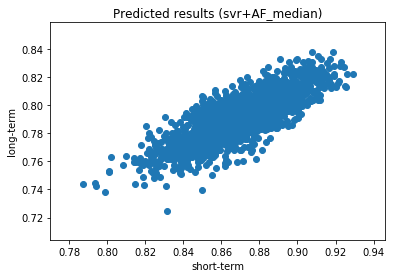

In [21]:
# visualize the prediction results
plt.figure()
plt.scatter(y_short_pred,y_long_pred,marker='o')
plt.xlabel('short-term')
plt.ylabel('long-term')
plt.title('Predicted results (svr+AF_median)')
#plt.show()
plt.savefig('svr+AF_median.eps')

In [22]:
# print the best score
print('Best short-term spearman score is {:.3f}'.format(A.best_score_))
A.best_params_
print('Best long-term spearman score is {:.3f}'.format(B.best_score_))
B.best_params_

Best short-term spearman score is 0.286
Best long-term spearman score is 0.127


{'pca__n_components': 0.95,
 'svr__C': 0.01,
 'svr__epsilon': 0.1,
 'svr__kernel': 'rbf'}

## Save the prediction results in submission required format

In [23]:
df_test['short-term'] = y_short_pred
df_test['long-term'] = y_long_pred
df_test['confidence_interval'] = 0 # not meaningful, this is required but not used for performance evaluation

In [24]:
df_test.head()

,video,AF_mean,AF_median,short-term,long-term,confidence_interval
0,video1.webm,"[0.69801, 0.126791, 0.560091, 0.09787, 0.52301...","[0.697488, 0.127302, 0.55834, 0.097968, 0.5209...",0.867146,0.793757,0
1,video1000.webm,"[0.644065, 0.711016, 0.596859, 0.728722, 0.397...","[0.643643, 0.711774, 0.600652, 0.730514, 0.400...",0.859690,0.778627,0
2,video1002.webm,"[0.297738, 0.316971, 0.458756, 0.305662, 0.412...","[0.30245, 0.327079, 0.452778, 0.304135, 0.4079...",0.881514,0.799260,0
3,video1008.webm,"[0.100712, 0.484618, 0.697495, 0.461341, 0.530...","[0.09765, 0.483399, 0.699809, 0.45408, 0.53140...",0.894391,0.789147,0
4,video1010.webm,"[0.519097, 0.379645, 0.217391, 0.297731, 0.147...","[0.522959, 0.400392, 0.202302, 0.309482, 0.130...",0.874015,0.780420,0


###  Requird format: videoname,[memorability score],[confidence value]
### comma seperated

In [25]:
res = df_test[['video','short-term','confidence_interval']]

In [26]:
run_name = 'me18in_TheHuskies_shortterm_run1-svr_afmedian.csv'
res.to_csv(path_or_buf=run_name,sep=',',header=False,index=False)

In [27]:
res1 = df_test[['video','long-term','confidence_interval']]
run_name1 = 'me18in_TheHuskies_longterm_run1-svr_afmedian.csv'
res1.to_csv(path_or_buf=run_name1,sep=',',header=False,index=False)